# CLIP transformer
Ths [CLIP transformer](https://arxiv.org/abs/2103.00020) was originally developed to classify images, with unknown classes at training time. On can use a pre-trained model for multiple classification tasks, by simply definint different classes at inference time.

This notebook is modified from example code [here](https://huggingface.co/docs/transformers/en/model_doc/clip).

In [1]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

We first download a pre-trained model.

In [13]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

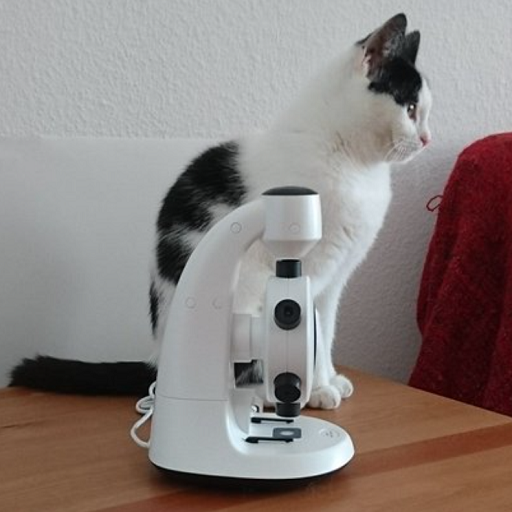

In [9]:
image = Image.open("data/real_cat.png")
image

In [8]:
#options = ["a photo of a cat", "a photo of a dog", "a photo of a microscope"]
options = ["a photo of a cat", "a photo of a dog"]

In [10]:
inputs = processor(text=options, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
probs

tensor([[0.9907, 0.0093]], grad_fn=<SoftmaxBackward0>)

In [11]:
label_probabilities = {k: v for k, v in zip(options, probs[0])}

In [12]:
label_probabilities

{'a photo of a cat': tensor(0.9907, grad_fn=<UnbindBackward0>),
 'a photo of a dog': tensor(0.0093, grad_fn=<UnbindBackward0>)}